In [63]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from decimal import *

In [3]:
conn = psycopg2.connect(dbname='admt_g02', user='admt_g02', password='xi6aeSoo', host='alcor.inf.unibz.it', port=5433)
cur = conn.cursor()

In [100]:
cur.execute('SELECT year_actual, month_actual, this_month, average_last_months FROM ( \
SELECT year_actual, month_actual, sum(raw_material_cost) as this_month,  \
		ROUND(AVG(SUM(raw_material_cost)) \
			OVER ( ORDER BY year_actual, month_actual \
			ROWS BETWEEN 6 PRECEDING \
			AND CURRENT ROW)::numeric,2) as average_last_months \
	FROM warehouse.production \
	JOIN warehouse.date ON date.date_id = production.end_date_id \
	GROUP BY year_actual, month_actual \
	ORDER BY year_actual, month_actual) as foo where year_actual = 2017;') 

res = cur.fetchall()

In [33]:
res

[(2017, 1, 2110974, Decimal('2129943.86')),
 (2017, 2, 2008490, Decimal('2120496.29')),
 (2017, 3, 2246238, Decimal('2136191.86')),
 (2017, 4, 1775081, Decimal('2065783.71')),
 (2017, 5, 2194679, Decimal('2073630.86')),
 (2017, 6, 2084510, Decimal('2066254.71')),
 (2017, 7, 2138008, Decimal('2079711.43')),
 (2017, 8, 2125828, Decimal('2081833.43')),
 (2017, 9, 2070150, Decimal('2090642.00')),
 (2017, 10, 2164744, Decimal('2079000.00')),
 (2017, 11, 2059218, Decimal('2119591.00')),
 (2017, 12, 1822067, Decimal('2066360.71'))]

In [43]:
x = [r[1] for r in res]
y1 = [r[2] for r in res]
y2 = [float(r[3]) for r in res]

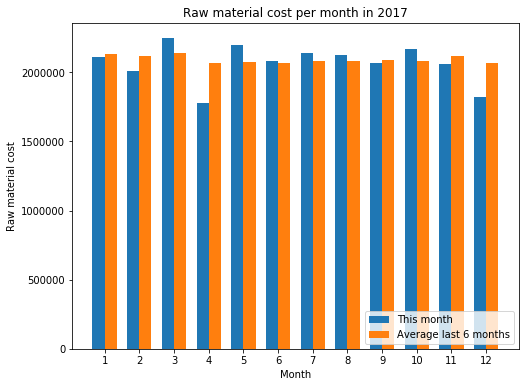

In [46]:
ind = np.arange(len(x))  
width = 0.35

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.bar(ind, y1, width, label='This month')
ax.bar(ind+width, y2, width, label='Average last 6 months')

ax.set_xlabel('Month')
ax.set_ylabel('Raw material cost')
ax.set_title('Raw material cost per month in 2017')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

ax.legend(loc='lower right')

plt.savefig('raw_costs')

In [63]:
cur.execute('SELECT date_actual, this_day, average_last_week \
FROM ( SELECT date_actual, year_actual, month_actual, sum(order_total_price) as this_day,  \
		ROUND(AVG(SUM(order_total_price)) \
			OVER ( ORDER BY date_actual \
			ROWS BETWEEN 7 PRECEDING \
			AND CURRENT ROW)::numeric,2) as average_last_week \
	FROM warehouse.showroom_visit \
	JOIN warehouse.date using (date_id) \
	JOIN warehouse.order using (order_id) \
	GROUP BY date_actual, year_actual, month_actual \
	ORDER BY date_actual) as res where year_actual = 2017 and month_actual = 12;')

res = cur.fetchall()

In [64]:
res

[(datetime.date(2017, 12, 1), Decimal('286042.56'), Decimal('167090.09')),
 (datetime.date(2017, 12, 2), Decimal('74202.10'), Decimal('145876.21')),
 (datetime.date(2017, 12, 3), Decimal('160355.50'), Decimal('139417.92')),
 (datetime.date(2017, 12, 4), Decimal('160878.18'), Decimal('123723.15')),
 (datetime.date(2017, 12, 5), Decimal('82365.34'), Decimal('128601.86')),
 (datetime.date(2017, 12, 6), Decimal('107854.20'), Decimal('135022.24')),
 (datetime.date(2017, 12, 7), Decimal('71560.69'), Decimal('129131.92')),
 (datetime.date(2017, 12, 8), Decimal('174917.32'), Decimal('139771.99')),
 (datetime.date(2017, 12, 9), Decimal('296196.43'), Decimal('141041.22')),
 (datetime.date(2017, 12, 10), Decimal('203603.47'), Decimal('157216.39')),
 (datetime.date(2017, 12, 11), Decimal('64961.24'), Decimal('145292.11')),
 (datetime.date(2017, 12, 12), Decimal('91883.11'), Decimal('136667.73')),
 (datetime.date(2017, 12, 14), Decimal('102757.65'), Decimal('139216.76')),
 (datetime.date(2017, 12, 

In [65]:
x = [r[0] for r in res]
y1 = [float(r[1]) for r in res]
y2 = [float(r[2]) for r in res]

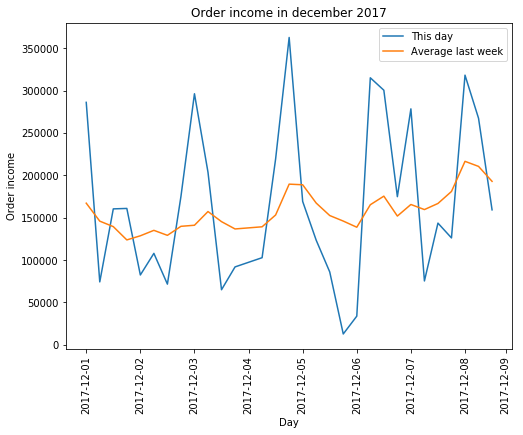

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x, y1, label='This day')
ax.plot(x, y2, label='Average last week')

ax.set_xlabel('Day')
ax.set_ylabel('Order income')
ax.set_title('Order income in december 2017')
ax.set_xticklabels(x, rotation='vertical')

ax.legend(loc='upper right')

plt.savefig('order_income')

In [89]:
cur.execute('SELECT year_actual, quarter_actual, \
	visitors_this_year, visitors_last_year, \
	visitors_this_year - visitors_last_year as difference \
	FROM ( \
		SELECT year_actual, quarter_actual, \
			count(visitor_id) as visitors_this_year, \
			LAG(count(visitor_id), 4) OVER (ORDER BY year_actual, quarter_actual) as visitors_last_year  \
		FROM warehouse.showroom_visit \
			JOIN warehouse.date using (date_id) \
			JOIN warehouse.order using (order_id) \
			GROUP BY year_actual, quarter_actual \
			ORDER BY year_actual, quarter_actual) as last_year \
		WHERE year_actual > 2015;')

res = cur.fetchall()

In [90]:
res

[(2016, 1, 433, 398, 35),
 (2016, 2, 186, 223, -37),
 (2016, 3, 158, 130, 28),
 (2016, 4, 458, 367, 91),
 (2017, 1, 448, 433, 15),
 (2017, 2, 247, 186, 61),
 (2017, 3, 176, 158, 18),
 (2017, 4, 400, 458, -58),
 (2018, 1, 504, 448, 56),
 (2018, 2, 297, 247, 50),
 (2018, 3, 173, 176, -3),
 (2018, 4, 484, 400, 84)]

In [91]:
x = [f'{r[1]}-{r[0]}' for r in res]
y1 = [r[2] for r in res]
y2 = [r[3] for r in res]

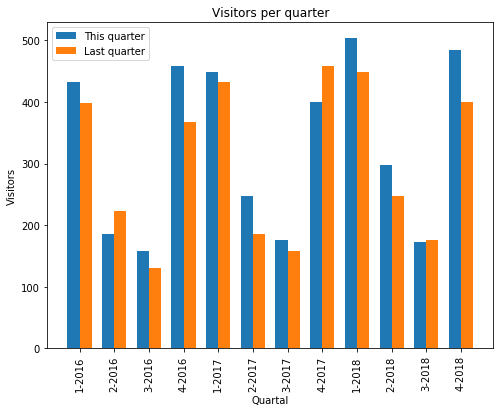

In [93]:
ind = np.arange(len(x))  
width = 0.35

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.bar(ind, y1, width, label='This quarter')
ax.bar(ind+width, y2, width, label='Last quarter')

ax.set_xlabel('Quartal')
ax.set_ylabel('Visitors')
ax.set_title('Visitors per quarter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x, rotation='vertical')

ax.legend(loc='best')

plt.savefig('visitors_quartal')

In [42]:
conn = psycopg2.connect(dbname='admt_g02', user='admt_g02', password='xi6aeSoo', host='alcor.inf.unibz.it', port=5433)
cur = conn.cursor()

In [22]:
cur.execute('SELECT showroom_name, count(visitor_id) \
	FROM warehouse.showroom_visit \
	JOIN warehouse.showroom using (showroom_id) \
	JOIN warehouse.date using (date_id) \
	WHERE year_actual = 2018 \
	GROUP BY showroom_name \
	order by count(visitor_id) desc;')

res = cur.fetchall()
res

[('Showroom-BOZEN', 14208),
 ('Showroom-ULTEN', 7216),
 ('Showroom-MÖLTEN', 6569),
 ('Showroom-LATSCH', 6538),
 ('Showroom-SEXTEN', 6009),
 ('Showroom-MÜHLBACH', 4527),
 ('Showroom-RATSCHINGS', 4494),
 ('Showroom-SALURN', 3827)]

In [23]:
x = [r[0] for r in res]
y = [r[1] for r in res]

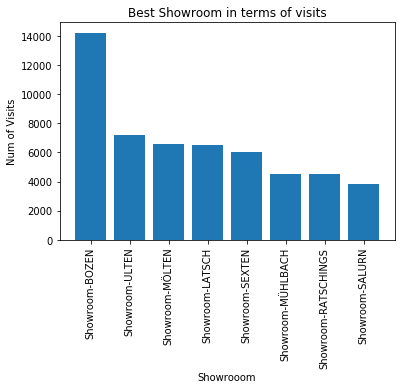

In [24]:
plt.bar(x,y)
plt.xticks(x,rotation=90)
plt.title('Best Showroom in terms of visits')
plt.xlabel('Showrooom')
plt.ylabel('Num of Visits')
plt.savefig('best_showroom')

In [25]:
cur.execute('SELECT vl.city, count(visitor_id) \
	FROM warehouse.showroom_visit \
	JOIN warehouse.visitor using (visitor_id) \
	JOIN warehouse.location as vl on warehouse.visitor.location_id = vl.location_id  \
	WHERE vl.province = \'Bozen\' \
	GROUP BY vl.city \
	order by count(visitor_id) desc;')

res = cur.fetchall()
res

[('BOZEN', 91386),
 ('GRAUN IN VINSCHGAU', 2791),
 ('MARTELL', 2761),
 ('KASTELBELL/TSCHARS', 2756),
 ('STILFS', 2739),
 ('BRENNER', 2718),
 ('TAUFERS IM MÜNSTERTAL', 2717),
 ('PFITSCH', 2714),
 ('PRAD AM STILFSERJOCH', 2679),
 ('MALS', 2673),
 ('FREIENFELD', 2669),
 ('SCHNALS', 2627),
 ('LAAS', 2615),
 ('SCHLANDERS', 2611),
 ('LATSCH', 2605),
 ('GLURNS', 2587),
 ('RATSCHINGS', 2574),
 ('VILLNÖSS', 2527),
 ('STERZING', 2519),
 ('SCHLUDERNS', 2498),
 ('MÜHLBACH', 2487),
 ('BRIXEN', 2479),
 ('TIERS', 2471),
 ('VILLANDERS', 2461),
 ('RITTEN', 2417),
 ('NATZ-SCHABS', 2416),
 ('FRANZENSFESTE', 2414),
 ('LAJEN', 2410),
 ('SARNTAL', 2400),
 ('MÖLTEN', 2372),
 ('LÜSEN', 2361),
 ('DEUTSCHNOFEN', 2354),
 ('KASTELRUTH', 2354),
 ('RODENECK', 2352),
 ('BARBIAN', 2349),
 ('WOLKENSTEIN IN GRÖDEN', 2336),
 ('VAHRN', 2331),
 ('FELDTHURNS', 2318),
 ('SANKT ULRICH', 2305),
 ('KLAUSEN', 2276),
 ('VÖLS', 2252),
 ('SANKT CHRISTINA IN GRÖDEN', 2235),
 ('WELSCHNOFEN', 2229),
 ('JENESIEN', 2203),
 ('KARNEID', 

In [26]:
x = [r[0] for r in res]
y = [r[1] for r in res]

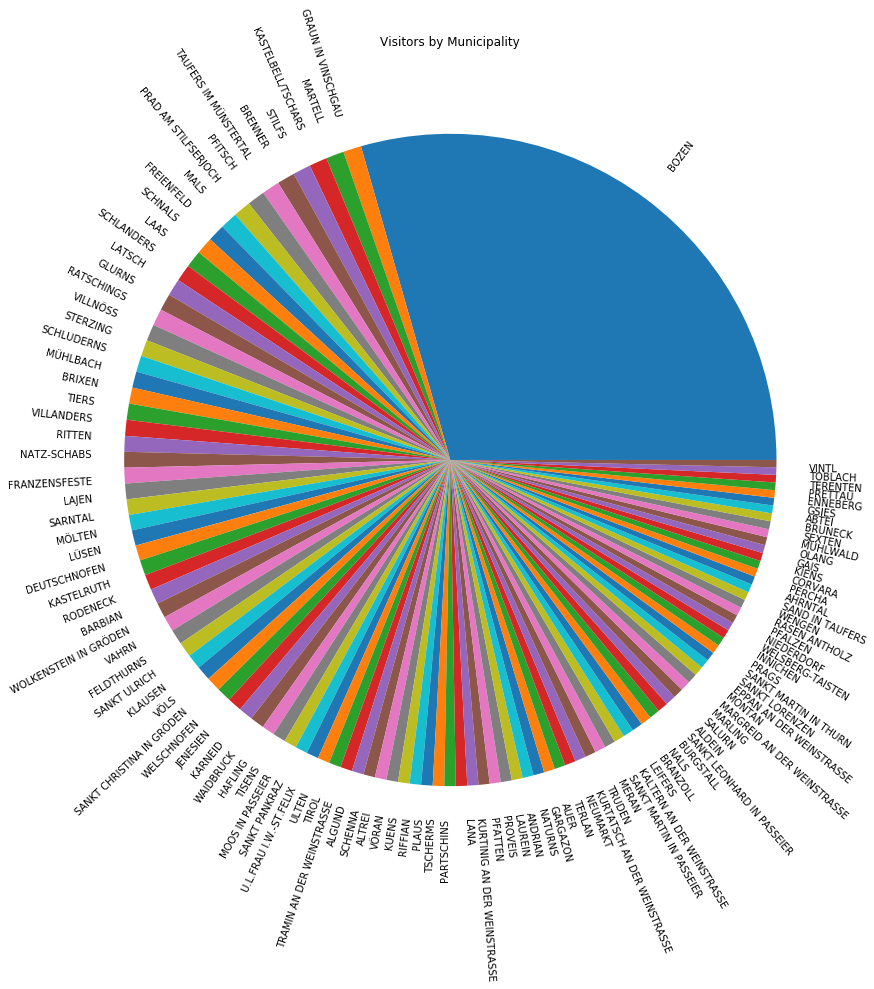

In [30]:
plt.figure(figsize=(15,15))
plt.pie(y,labels=x,rotatelabels=True)
plt.title('Visitors by Municipality')
plt.savefig('municipality')

In [31]:
cur.execute('SELECT vl.district, count(visitor_id) \
	FROM warehouse.showroom_visit \
	JOIN warehouse.visitor using (visitor_id) \
	JOIN warehouse.location as vl on warehouse.visitor.location_id = vl.location_id  \
	WHERE vl.province = \'Bozen\' \
	GROUP BY vl.district \
	order by count(visitor_id) desc;')

res = cur.fetchall()
res

[('Bozen', 91386),
 ('Burggrafenamt ', 45732),
 ('Vinschgau', 34659),
 ('Pustertal', 32688),
 ('Eisacktal', 30936),
 ('Salten Schlern', 30130),
 ('Überetsch-Südtiroler Unterland', 29511),
 ('Wipptal', 15608)]

In [36]:
x = [r[0] for r in res]
y = [r[1] for r in res]

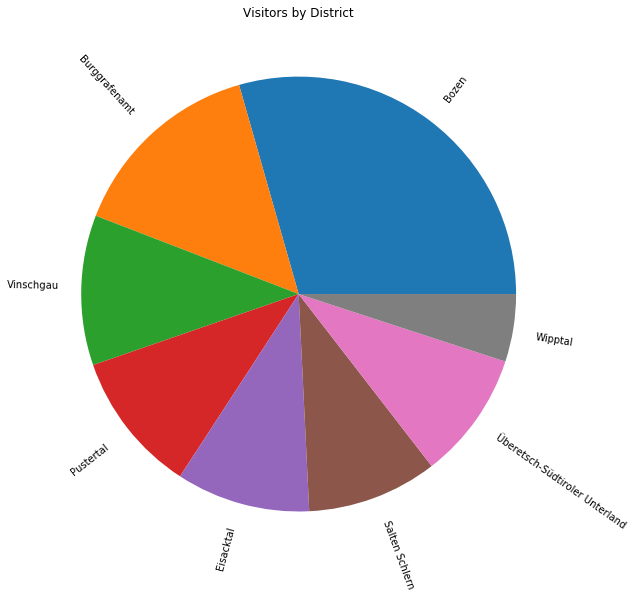

In [37]:
plt.figure(figsize=(10,10))
plt.pie(y,labels=x,rotatelabels=True)
plt.title('Visitors by District')
plt.savefig('district')

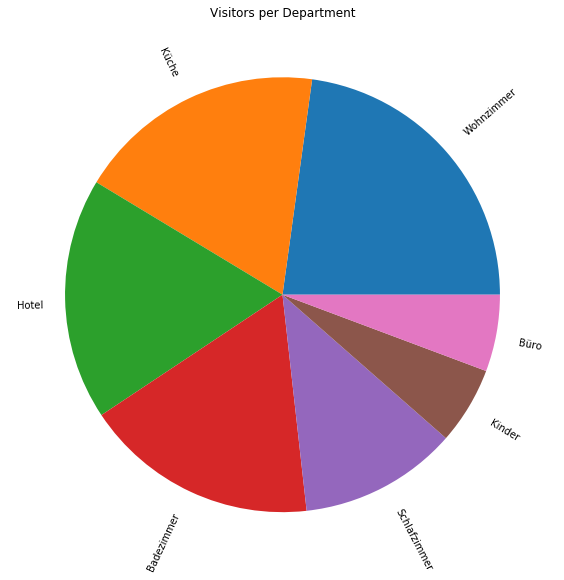

In [45]:
cur.execute('SELECT department_name, count(visitor_id) \
	FROM warehouse.showroom_visit \
	JOIN warehouse.department using (department_id) \
	GROUP BY department_name \
	order by count(visitor_id) desc;')

res = cur.fetchall()

x = [r[0] for r in res]
y = [r[1] for r in res]

plt.figure(figsize=(10,10))
plt.pie(y,labels=x,rotatelabels=True)
plt.title('Visitors per Department')
plt.savefig('departmetn')

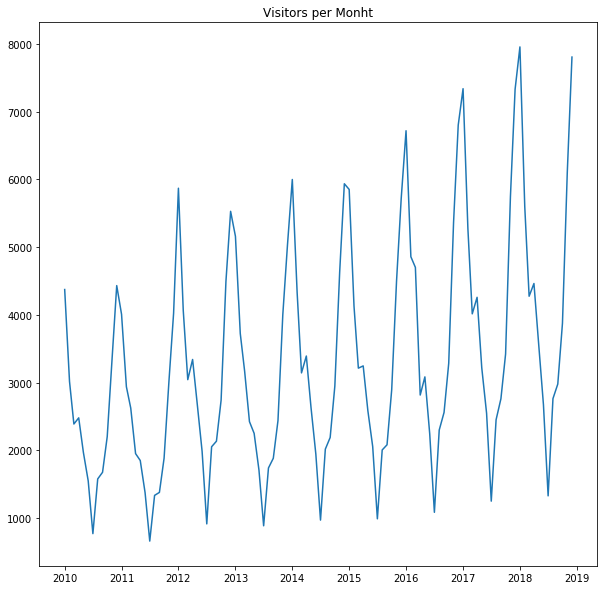

In [65]:
cur.execute('SELECT year_actual, month_actual, count(visitor_id) \
	FROM warehouse.showroom_visit \
	JOIN warehouse.date using (date_id) \
	GROUP BY year_actual, month_actual')

res = cur.fetchall()

x = [dt.datetime.strptime(f'{r[0]}-{r[1]}-1','%Y-%m-%d').date() for r in res]
y = [r[2] for r in res]

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.title('Visitors per Monht')
plt.savefig('month')